In [133]:
from lib.utils import *

In [134]:
df = load_psd_list(range(0,32))
y = df.pop('label')
X = df.to_numpy()

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,random_state=0)

In [166]:
X_win = []
y_win = []
for i in range(len(X_train)-4):
    X_win.append(X_train[i:i+5].flatten())
    if(len(y_train[i:i+5].mode()) == 0):
        y_win.append(y_train[i+2])
    else:
        y_win.append(y_train[i:i+5].mode()[0])
X_win = np.array(X_win)
y_win = np.array(y_win)
df_win = pd.concat([pd.DataFrame(y_win,columns=['label']),pd.DataFrame(X_win)],axis=1)


In [181]:
df_win['label'].value_counts()

W    112033
S    104956
P      4191
Name: label, dtype: int64

In [182]:
df_win = df_win[df_win['label'] != 'X']
## Balance df_train
## Concatenate P Class
df_win_P = pd.DataFrame()
for i in range(25):
    df_win_P = pd.concat([df_win_P,df_win[df_win['label'] == 'P']])
df_win_S = df_win[df_win['label'] == 'S']
df_win_W = df_win[df_win['label'] == 'W']
df_train = pd.concat([df_win_P,df_win_S,df_win_W]).reset_index(drop=True)

In [183]:
y_train = df_train.pop('label')
X_train = df_train

In [184]:
y_train.value_counts()

W    112033
S    104956
P    104775
Name: label, dtype: int64

In [185]:
y_test.value_counts()

W    27707
S    24619
P     2959
X       11
Name: label, dtype: int64

In [85]:
# ## Balance df_train
# ## Concatenate P Class
# df_train = pd.concat([y_train,X_train],axis=1)
# df_win_P = pd.DataFrame()
# for i in range(9):
#     df_win_P = pd.concat([df_win_P,df_train[df_train['label'] == 'P']])
# df_win_S = df_train[df_train['label'] == 'S']
# df_win_W = df_train[df_train['label'] == 'W']
# df_train = pd.concat([df_win_P,df_win_S,df_win_W]).reset_index(drop=True)

In [186]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [194]:
X_win = []
for i in range(len(X_test)-4):
    X_win.append(X_test[i:i+5].flatten())
X_win = np.array(X_win)
df_win = pd.DataFrame(X_win)

In [195]:
df_win

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,56.373286,33.884410,45.614903,29.864785,68.545176,62.810024,23.926744,16.406577,27.855448,12.411921,...,2.504983,0.934974,2.014938,3.404944,1.938154,1.393437,1.612583,3.095069,-0.490097,0.100994
1,628.658579,49.121355,28.429807,15.827240,14.750122,29.109612,25.209231,25.178287,19.317421,17.010655,...,9.110069,1.986282,4.102164,5.461799,1.413264,8.753748,4.973849,5.797971,0.085464,0.100994
2,63.621896,10.613201,34.310398,30.352352,6.723852,41.645248,25.758708,16.857055,37.184440,26.550146,...,6.835208,5.759874,2.391183,5.258511,4.023782,3.066995,3.734468,3.809667,-3.469650,0.100299
3,123.793604,183.237855,231.699961,167.717778,111.516289,200.961361,192.218348,71.098446,62.456006,129.744704,...,1.834948,3.251616,3.700143,0.731026,0.829136,2.001569,2.264746,2.275043,4.563276,0.000992
4,36.848998,83.019006,58.285596,25.878696,27.004562,52.769337,47.603808,66.578021,77.194981,31.509393,...,4.314792,6.159041,3.197873,1.715016,2.800716,5.394814,1.380438,3.014608,0.336524,0.000992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,228.276921,1532.897998,892.132090,1901.274064,681.846109,344.708121,594.560962,159.197698,118.374238,244.425203,...,2.654339,3.236239,1.626562,1.868649,2.163002,1.550764,2.212396,3.141495,-1.273809,0.601001
55288,13.676562,29.949658,26.775957,11.904391,14.601871,19.286695,10.869863,6.997551,4.203373,10.175224,...,25.186109,15.589896,9.632606,23.106594,23.540245,4.732120,13.432779,7.956694,0.129365,0.000992
55289,64.859072,73.740469,62.683304,47.193162,94.625618,32.964846,46.887941,17.216814,45.700252,40.909440,...,5.022984,19.024421,5.510763,13.629301,9.763695,4.659634,5.483944,3.515438,-0.334896,0.000992
55290,243.628026,120.695013,36.249554,81.915246,53.197918,60.873704,14.566245,17.956123,46.223805,19.397678,...,3.743800,1.564205,1.378417,1.104593,2.129037,2.723845,2.504902,1.232122,1.145471,0.000992


In [196]:
y_pred = clf.predict(df_win)
# clf.score(X_test,y_test)

In [214]:
y_distilled = ["X","X","X","X"]
for i in range(0,len(y_pred)-4):
    y_distilled.append(pd.DataFrame(y_pred[i:i+5]).mode()[0][0])


In [218]:
y_distilled = y_distilled + ["X","X","X","X"]

In [227]:
y_test = y_test.reset_index(drop=True)

In [233]:

df = pd.concat([pd.DataFrame(y_distilled),y_test],axis=1)
df = df[(df != "X").all(axis=1)]
y_pred = df.iloc[:,0]
y_test = df.iloc[:,1]

In [234]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[    2,  1014,  1941],
       [    1, 14723,  9893],
       [    0,  8452, 19251]])

0.6146498543698102

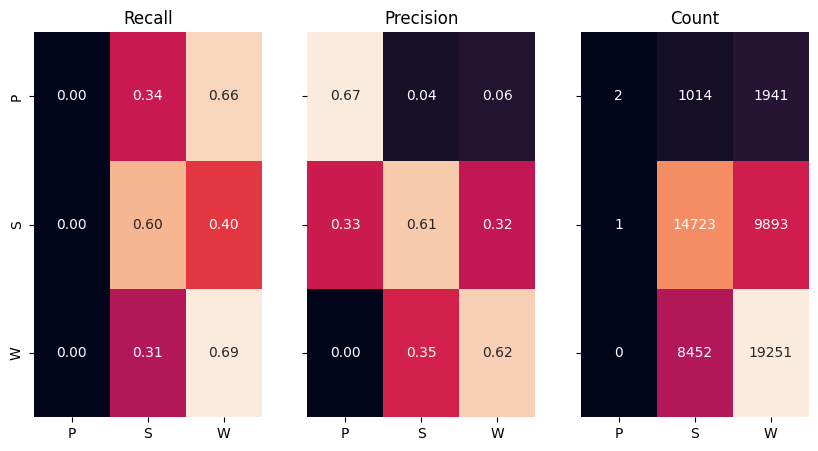

In [235]:
from sklearn.metrics import confusion_matrix
fig,axes = plt.subplots(1,3,sharey=True,figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'),annot=True,ax=axes[0],cbar=False,fmt='.2f')
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='pred'),annot=True,ax=axes[1],cbar=False,fmt='.2f')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,ax=axes[2],cbar=False,fmt='d')
axes[0].set_title('Recall')
axes[1].set_title('Precision')
axes[2].set_title('Count')
axes[0].set_xticklabels(['P','S','W'])
axes[1].set_xticklabels(['P','S','W'])
axes[2].set_xticklabels(['P','S','W'])
axes[0].set_yticklabels(['P','S','W'])
plt.savefig('cm.jpg',dpi=200,bbox_inches='tight')
from sklearn.metrics import balanced_accuracy_score,accuracy_score
accuracy_score(y_true=y_test,y_pred=y_pred)